In [1]:
import pandas as pd 
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import nltools
import glob

%matplotlib inline
sns.set_style("whitegrid")

base_dir = '/Users/emma/Dropbox/ConversationStudy/topic_models_open_data/cluster/evaluate_models'

Get models in correct format

In [80]:
#flist = glob.glob(os.path.join(base_dir,'output_3','*.csv'))
flist = glob.glob(os.path.join(base_dir,'output_3_no_stemming','*.csv'))

for file in flist:

    data = pd.read_csv(file)
    name = file.split('/')[-1].split('.csv')[0]
    #new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']
    new_header = ['computer_science_1','computer_science_2','computer_science_3','computer_science_4','football_1','football_2','football_3','football_4','fraternities_and_sororities_1','fraternities_and_sororities_2','fraternities_and_sororities_3','fraternities_and_sororities_4','neuroscience_1','neuroscience_2','neuroscience_3','neuroscience_4','religion_1','religion_2','religion_3','religion_4','theatre_1','theatre_2','theatre_3','theatre_4']

    data = data.sort_values(by=['topic']) # this is critcal
    data.pop('Unnamed: 0')
    data.pop('topic')

    topics_transpose = data.transpose()
    topics_transpose.columns = new_header

    corr_matrix=topics_transpose.corr()

    data_1 = nltools.data.Adjacency(data=corr_matrix.values)
    #data_1.write(os.path.join(base_dir,'output_3_long','{0}.csv').format(name), method='long')
    data_1.write(os.path.join(base_dir,'output_3_long_no_stemming','{0}.csv').format(name), method='long')

Compare to an 'ideal' version

In [82]:
#flist = glob.glob(os.path.join(base_dir,'output_3_long','*.csv'))
flist = glob.glob(os.path.join(base_dir,'output_3_long_no_stemming','*.csv'))

evaluate_wiki = pd.DataFrame()
evaluate_wiki = evaluate_wiki.fillna(0) # with 0s rather than NaNs

counter = 0 

for file in flist:
    
    perfect_data = pd.read_csv(os.path.join(base_dir,'perfect_wiki_long_3.csv'))
    perfect_data = perfect_data['0'].values
    
    test_data = pd.read_csv(file)
    test_data = test_data['0'].values
    
    name = file.split('/')[-1].split('.csv')[0]
    
    correlation_term = np.corrcoef(test_data,perfect_data)[0][1]

    evaluate_wiki.at[counter,'model'] = name
    evaluate_wiki.at[counter,'correlation'] = correlation_term

    counter = counter + 1
    
    


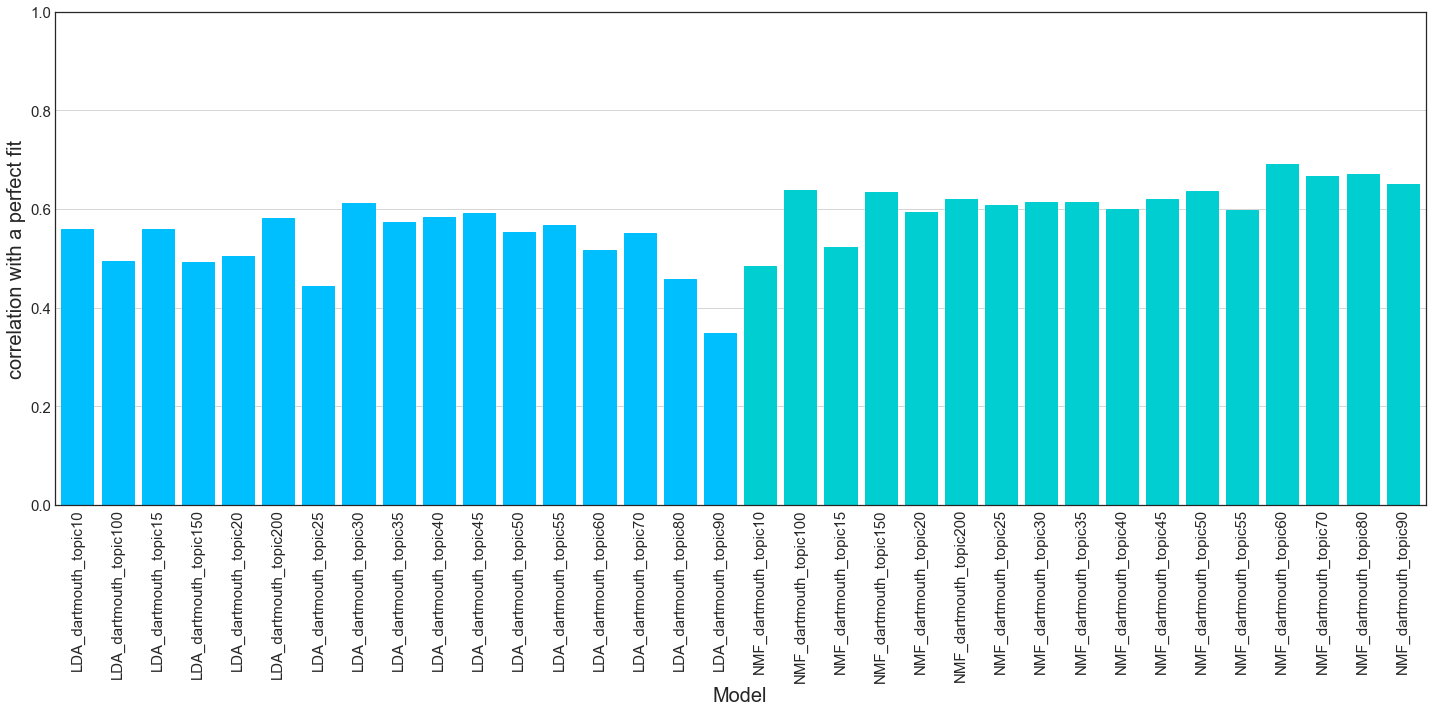

In [85]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))
barlist = plt.bar(evaluate_wiki['model'],evaluate_wiki['correlation'])
plt.margins(x=0.005)
plt.xticks(rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Model', fontsize=20)
plt.ylabel('correlation with a perfect fit', fontsize=20)
plt.grid(axis='y')

axes = plt.gca()
axes.set_ylim([0,1])

for i in range(17):
    barlist[i].set_color('DeepSkyBlue')
for i in range(17,34):
    barlist[i].set_color('DarkTurquoise')
#for i in range(34,51):
#    barlist[i].set_color('LightSkyBlue')
#for i in range(51,68):
#    barlist[i].set_color('PaleTurquoise')
plt.tight_layout()
#plt.savefig('model_evaluation_matrix_correlation.pdf',facecolor=fig.get_facecolor(), edgecolor='none')
plt.savefig('model_evaluation_matrix_correlation_no_stemming.pdf', edgecolor='none')


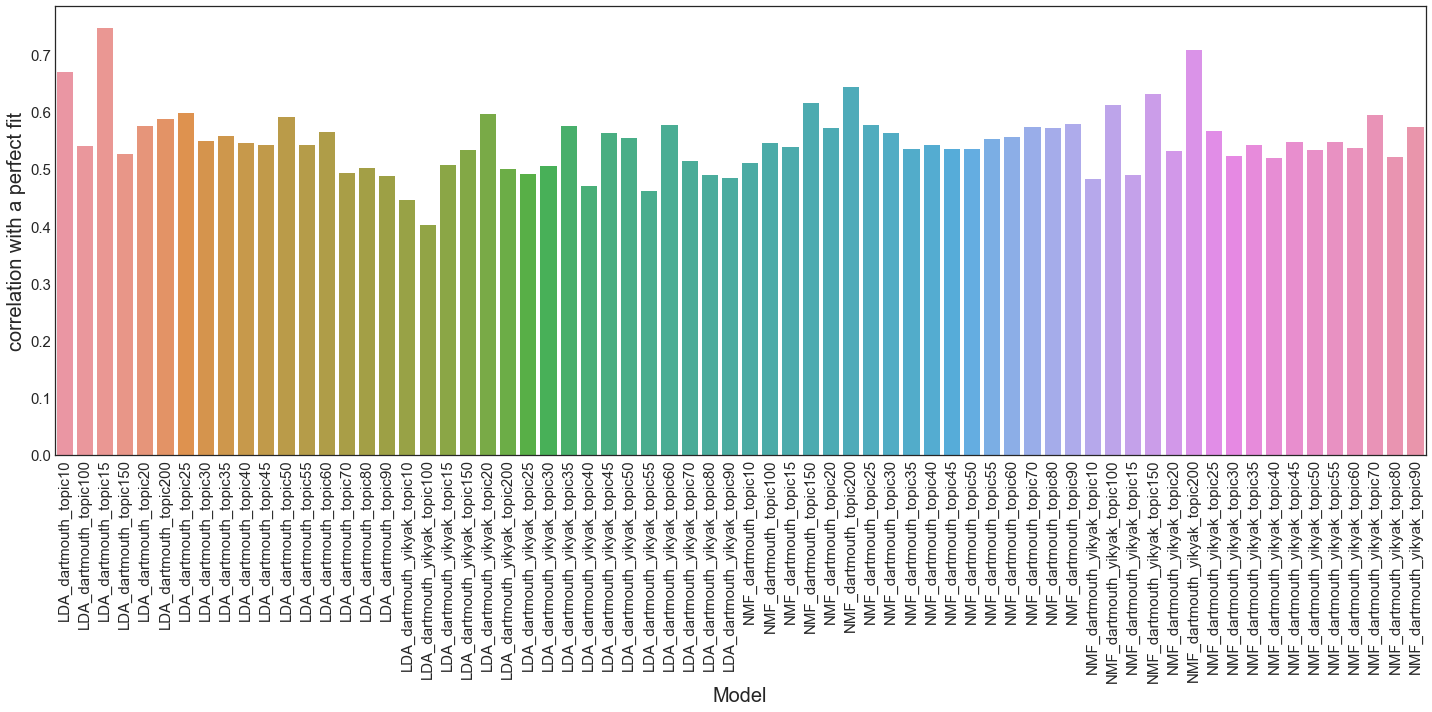

In [6]:
plt.figure(figsize=(20,10))
sns.barplot(evaluate_wiki['model'],evaluate_wiki['correlation'])
plt.xticks(rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Model', fontsize=20)
plt.ylabel('correlation with a perfect fit', fontsize=20)
plt.tight_layout()

# Average "hits"

In [86]:
#flist = glob.glob(os.path.join(base_dir,'output_3','*.csv'))
flist = glob.glob(os.path.join(base_dir,'output_3_no_stemming','*.csv'))


topic_segments = 4

evaluate_wiki = pd.DataFrame()
evaluate_wiki = evaluate_wiki.fillna(0)

counter_row = 0

for file in flist:
    
    counter = 0
    
    subset_corrs = []

    data = pd.read_csv(file)
    name = file.split('/')[-1].split('.csv')[0]
    #new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']
    new_header = ['computer_science_1','computer_science_2','computer_science_3','computer_science_4','football_1','football_2','football_3','football_4','fraternities_and_sororities_1','fraternities_and_sororities_2','fraternities_and_sororities_3','fraternities_and_sororities_4','neuroscience_1','neuroscience_2','neuroscience_3','neuroscience_4','religion_1','religion_2','religion_3','religion_4','theatre_1','theatre_2','theatre_3','theatre_4']

    data = data.sort_values(by=['topic']) # this is critcal
    
    for i in range(6):
        subset = data[counter:counter+topic_segments]
        subset.pop('Unnamed: 0')
        subset.pop('topic')

        topics_transpose = subset.transpose()
        #topics_transpose.columns = new_header

        corr_matrix=topics_transpose.corr()
        
        subset_correlation = np.sum(np.tril(corr_matrix, -1))/6
        subset_corrs.append(subset_correlation)
        
        counter = counter + 4
        
    mean_hits = np.mean(subset_corrs)
    
    evaluate_wiki.at[counter_row,'model'] = name
    evaluate_wiki.at[counter_row,'correlation'] = mean_hits

    counter_row = counter_row + 1

    #data_1 = nltools.data.Adjacency(data=corr_matrix.values)
    #data_1.write(os.path.join(base_dir,'output_long','{0}.csv').format(name), method='long')

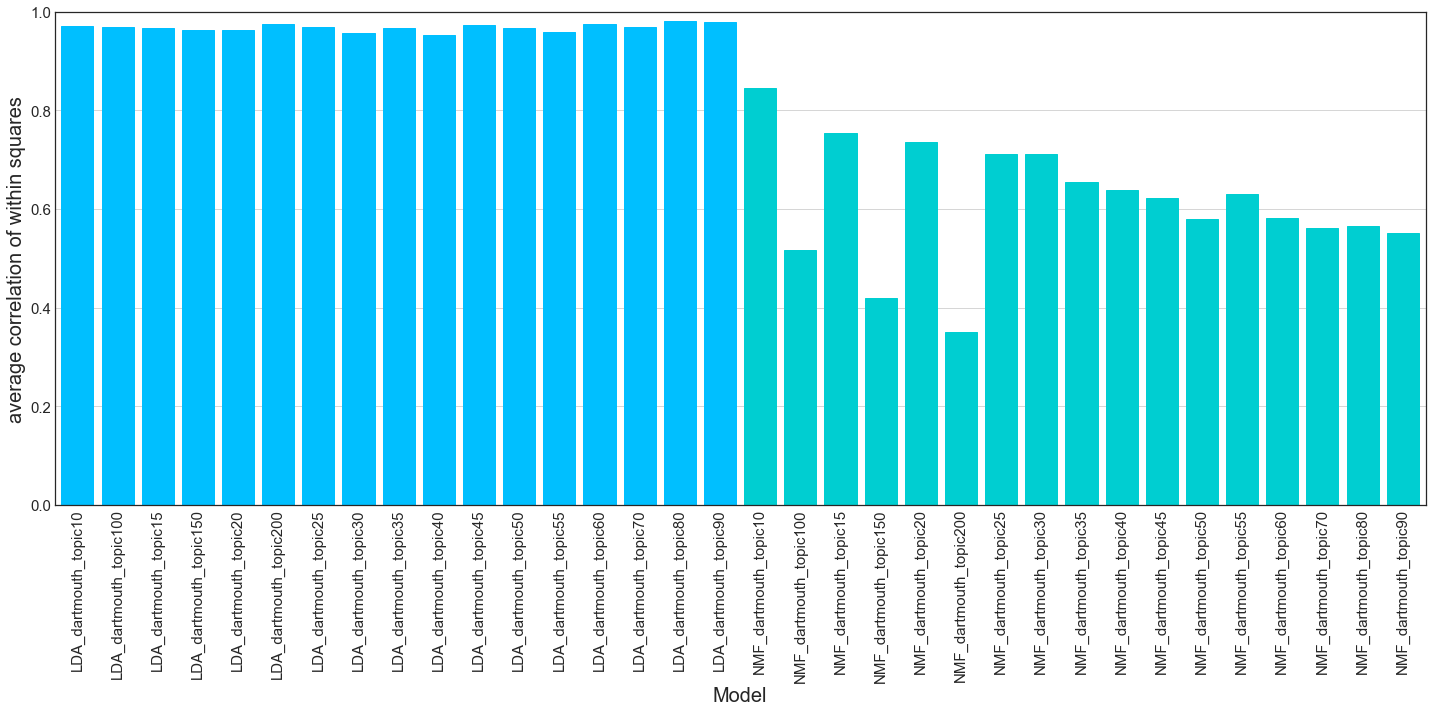

In [87]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))
barlist = plt.bar(evaluate_wiki['model'],evaluate_wiki['correlation'])
plt.margins(x=0.005)
plt.xticks(rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Model', fontsize=20)
plt.ylabel('average correlation of within squares', fontsize=20)
plt.grid(axis='y')

axes = plt.gca()
axes.set_ylim([0,1])

for i in range(17):
    barlist[i].set_color('DeepSkyBlue')
for i in range(17,34):
    barlist[i].set_color('DarkTurquoise')
#for i in range(34,51):
#    barlist[i].set_color('LightSkyBlue')
#for i in range(51,68):
#    barlist[i].set_color('PaleTurquoise')
plt.tight_layout()
#plt.savefig('model_evaluation_within_squares.pdf',facecolor=fig.get_facecolor(), edgecolor='none')
plt.savefig('model_evaluation_within_squares_no_stemming.png', edgecolor='none')


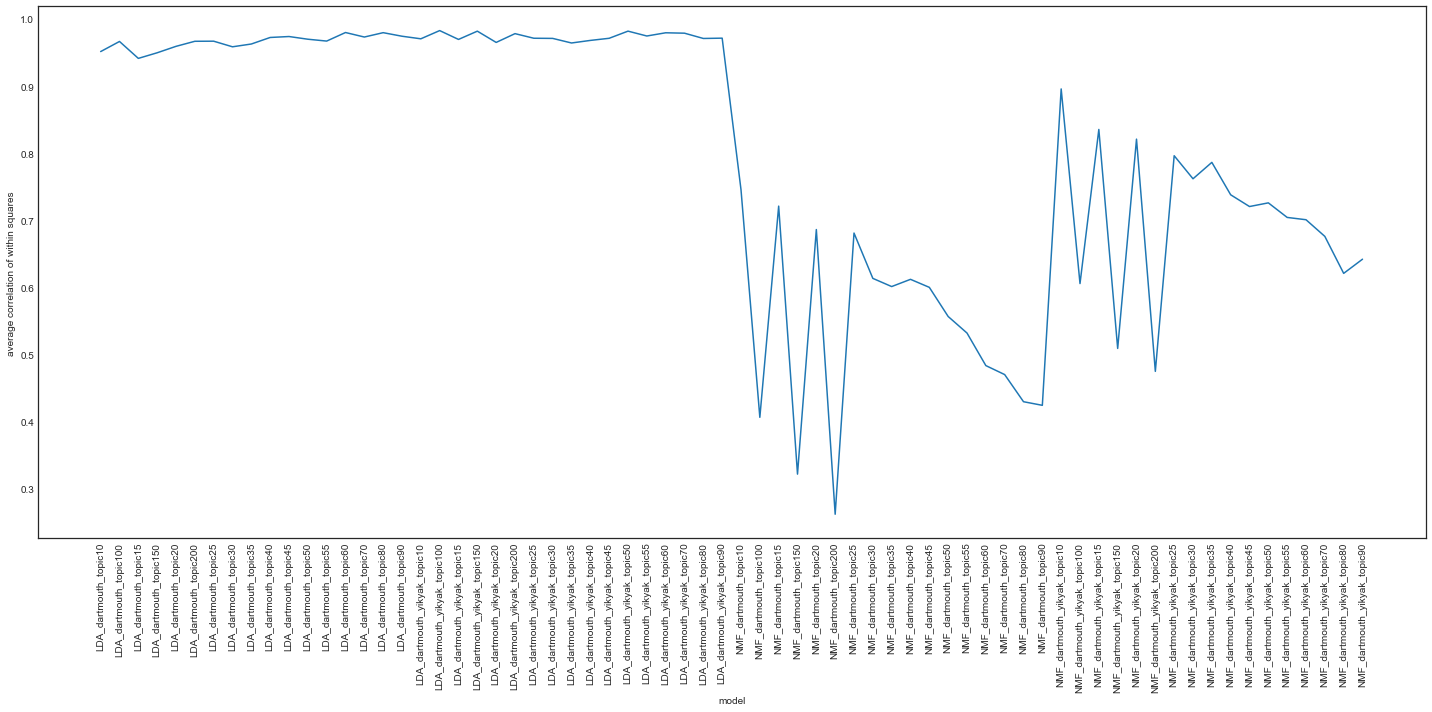

In [9]:
plt.figure(figsize=(20,10))
plt.plot(evaluate_wiki['model'],evaluate_wiki['correlation'])
plt.xticks(rotation='vertical')
plt.xlabel('model')
plt.ylabel('average correlation of within squares')
plt.tight_layout()
plt.savefig('model_evaluation_within_squares.png')

# Average within minus between

In [88]:
#flist = glob.glob(os.path.join(base_dir,'output_3','*.csv'))
flist = glob.glob(os.path.join(base_dir,'output_3_no_stemming','*.csv'))

topic_segments = 4

evaluate_wiki = pd.DataFrame()
evaluate_wiki = evaluate_wiki.fillna(0)

counter_row = 0

for file in flist:
    
    counter = 0
    
    subset_corrs = []
    between_corrs = []

    data = pd.read_csv(file)
    name = file.split('/')[-1].split('.csv')[0]
    #new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']
    new_header = ['computer_science_1','computer_science_2','computer_science_3','computer_science_4','football_1','football_2','football_3','football_4','fraternities_and_sororities_1','fraternities_and_sororities_2','fraternities_and_sororities_3','fraternities_and_sororities_4','neuroscience_1','neuroscience_2','neuroscience_3','neuroscience_4','religion_1','religion_2','religion_3','religion_4','theatre_1','theatre_2','theatre_3','theatre_4']

    data = data.sort_values(by=['topic']) # this is critcal

    data.pop('Unnamed: 0')
    data.pop('topic')

    topics_transpose = data.transpose()
    topics_transpose.columns = new_header

    corr_matrix=topics_transpose.corr()
    
    #between_corrs.append(np.sum(corr_matrix["choir_1"][4:]))
    #between_corrs.append(np.sum(corr_matrix["choir_2"][4:]))
    #between_corrs.append(np.sum(corr_matrix["choir_3"][4:]))
    #between_corrs.append(np.sum(corr_matrix["choir_4"][4:]))
    #between_corrs.append(np.sum(corr_matrix["computer_science_1"][8:]))
    #between_corrs.append(np.sum(corr_matrix["computer_science_2"][8:]))
    #between_corrs.append(np.sum(corr_matrix["computer_science_3"][8:]))
    #between_corrs.append(np.sum(corr_matrix["computer_science_4"][8:]))
    #between_corrs.append(np.sum(corr_matrix["dining_hall_1"][12:]))
    #between_corrs.append(np.sum(corr_matrix["dining_hall_2"][12:]))
    #between_corrs.append(np.sum(corr_matrix["dining_hall_3"][12:]))
    #between_corrs.append(np.sum(corr_matrix["dining_hall_4"][12:]))
    #between_corrs.append(np.sum(corr_matrix["football_1"][16:]))
    #between_corrs.append(np.sum(corr_matrix["football_2"][16:]))
    #between_corrs.append(np.sum(corr_matrix["football_3"][16:]))
    #between_corrs.append(np.sum(corr_matrix["football_4"][16:]))
    #between_corrs.append(np.sum(corr_matrix["fraternity_1"][20:]))
    #between_corrs.append(np.sum(corr_matrix["fraternity_2"][20:]))
    #between_corrs.append(np.sum(corr_matrix["fraternity_3"][20:]))
    #between_corrs.append(np.sum(corr_matrix["fraternity_4"][20:]))
    #between_corrs.append(np.sum(corr_matrix["sorority_1"][24:]))
    #between_corrs.append(np.sum(corr_matrix["sorority_2"][24:]))
    #between_corrs.append(np.sum(corr_matrix["sorority_3"][24:]))
    #between_corrs.append(np.sum(corr_matrix["sorority_4"][24:]))
    
    between_corrs.append(np.sum(corr_matrix["computer_science_1"][4:]))
    between_corrs.append(np.sum(corr_matrix["computer_science_2"][4:]))
    between_corrs.append(np.sum(corr_matrix["computer_science_3"][4:]))
    between_corrs.append(np.sum(corr_matrix["computer_science_4"][4:]))
    between_corrs.append(np.sum(corr_matrix["football_1"][8:]))
    between_corrs.append(np.sum(corr_matrix["football_2"][8:]))
    between_corrs.append(np.sum(corr_matrix["football_3"][8:]))
    between_corrs.append(np.sum(corr_matrix["football_4"][8:]))
    between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_1"][12:]))
    between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_2"][12:]))
    between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_3"][12:]))
    between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_4"][12:]))
    between_corrs.append(np.sum(corr_matrix["neuroscience_1"][16:]))
    between_corrs.append(np.sum(corr_matrix["neuroscience_2"][16:]))
    between_corrs.append(np.sum(corr_matrix["neuroscience_3"][16:]))
    between_corrs.append(np.sum(corr_matrix["neuroscience_4"][16:]))
    between_corrs.append(np.sum(corr_matrix["religion_1"][20:]))
    between_corrs.append(np.sum(corr_matrix["religion_2"][20:]))
    between_corrs.append(np.sum(corr_matrix["religion_3"][20:]))
    between_corrs.append(np.sum(corr_matrix["religion_4"][20:]))
    
    #between_average = (np.sum(between_corrs))/336
    between_average = (np.sum(between_corrs))/240
    
    data = pd.read_csv(file)
    data = data.sort_values(by=['topic'])
    
    for i in range(6):
        subset = data[counter:counter+topic_segments]
        subset.pop('Unnamed: 0')
        subset.pop('topic')

        topics_transpose = subset.transpose()
        #topics_transpose.columns = new_header

        corr_matrix=topics_transpose.corr()
        
        subset_correlation = np.sum(np.tril(corr_matrix, -1))/6
        subset_corrs.append(subset_correlation)
        
        counter = counter + 4
        
    mean_hits = np.mean(subset_corrs)
    
    within_minus_between = mean_hits - between_average
    
    evaluate_wiki.at[counter_row,'model'] = name
    evaluate_wiki.at[counter_row,'correlation'] = within_minus_between

    counter_row = counter_row + 1

    #data_1 = nltools.data.Adjacency(data=corr_matrix.values)
    #data_1.write(os.path.join(base_dir,'output_long','{0}.csv').format(name), method='long')




In [24]:
evaluate_wiki

,model,correlation
0,LDA_dartmouth_topic10,0.678822
1,LDA_dartmouth_topic100,0.406244
2,LDA_dartmouth_topic15,0.658012
3,LDA_dartmouth_topic150,0.306867
4,LDA_dartmouth_topic20,0.491891
5,LDA_dartmouth_topic200,0.463814
6,LDA_dartmouth_topic25,0.448170
7,LDA_dartmouth_topic30,0.450629
8,LDA_dartmouth_topic35,0.418311
9,LDA_dartmouth_topic40,0.365861


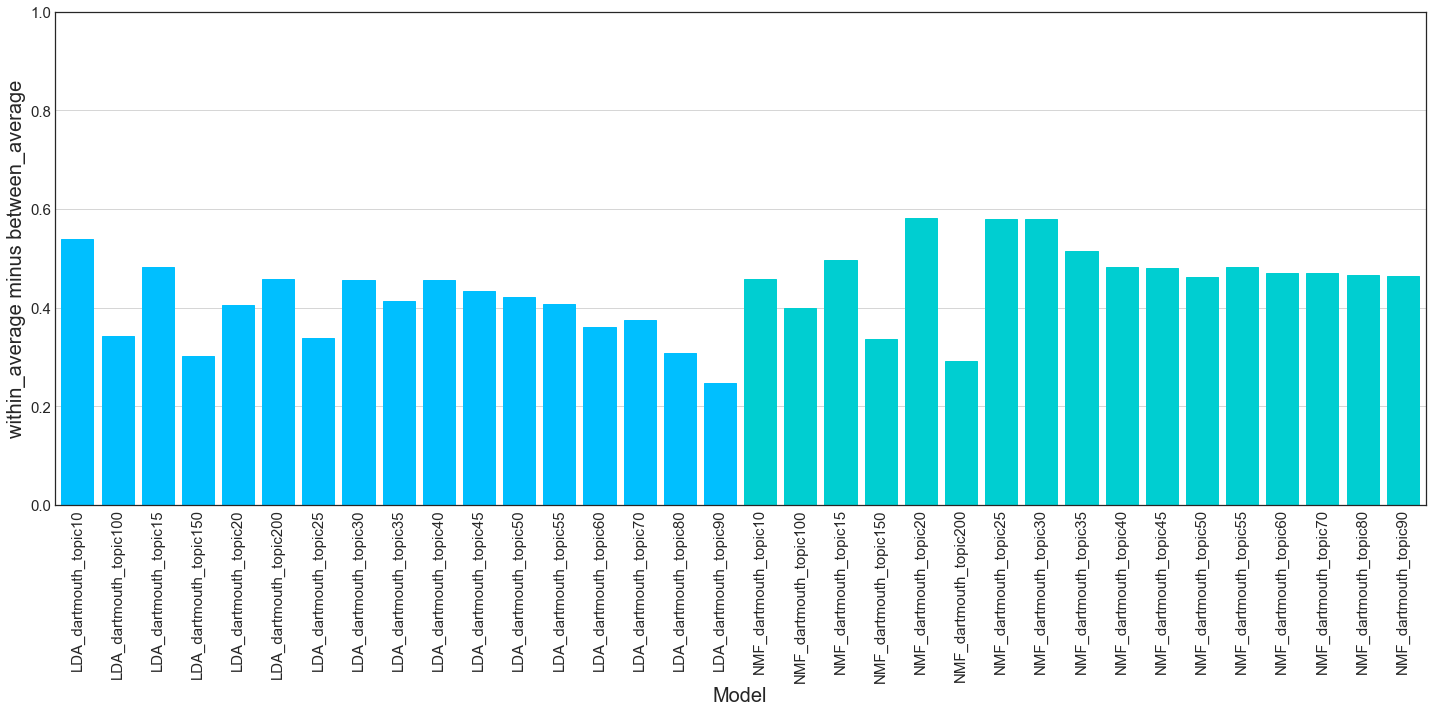

In [89]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))
barlist = plt.bar(evaluate_wiki['model'],evaluate_wiki['correlation'])
plt.margins(x=0.005)
plt.xticks(rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Model', fontsize=20)
plt.ylabel('within_average minus between_average', fontsize=20) 
plt.grid(axis='y')

axes = plt.gca()
axes.set_ylim([0,1])

for i in range(17):
    barlist[i].set_color('DeepSkyBlue')
for i in range(17,34):
    barlist[i].set_color('DarkTurquoise')
#for i in range(34,51):
#    barlist[i].set_color('LightSkyBlue')
#for i in range(51,68):
#    barlist[i].set_color('PaleTurquoise')
plt.tight_layout()
#plt.savefig('model_evaluation_within_minus_between.pdf',facecolor=fig.get_facecolor(), edgecolor='none')
plt.savefig('model_evaluation_within_minus_between_no_stemming.png', edgecolor='none')

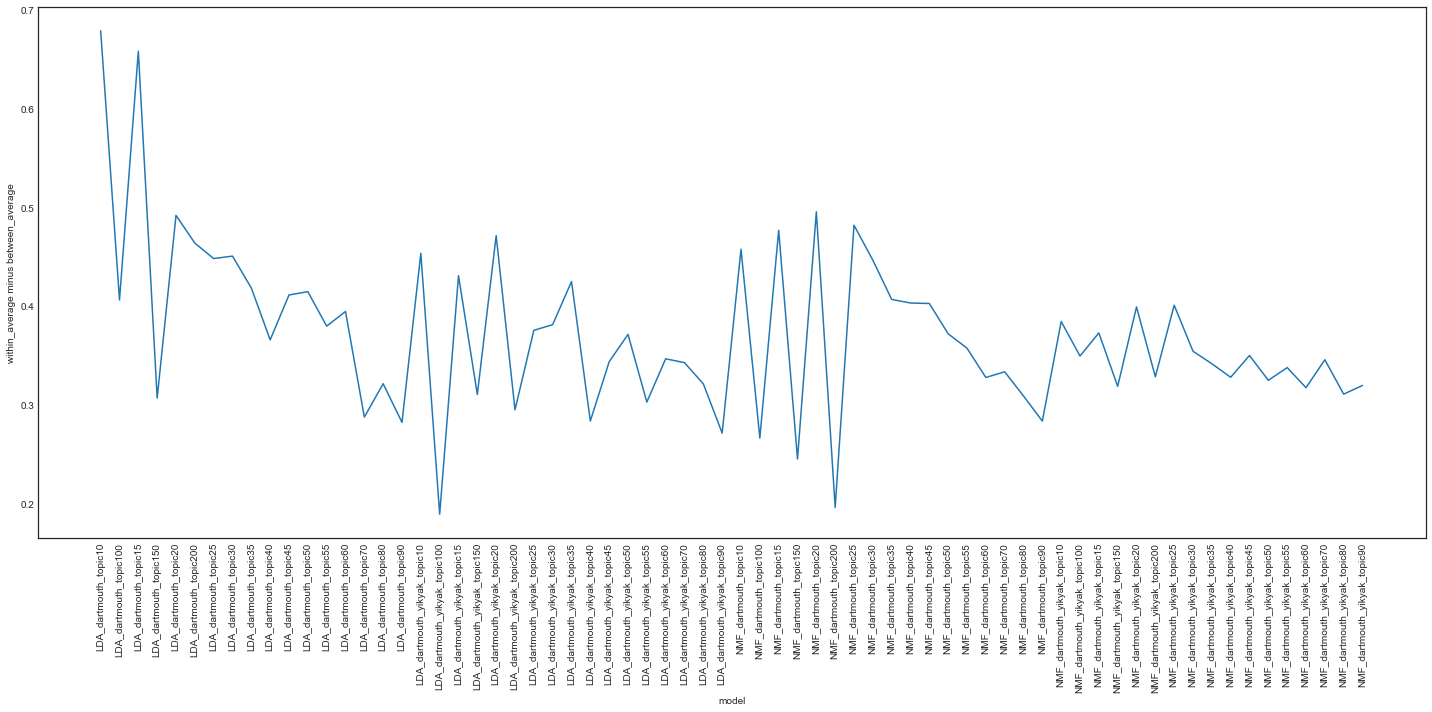

In [12]:
plt.figure(figsize=(20,10))
plt.plot(evaluate_wiki['model'],evaluate_wiki['correlation'])
plt.xticks(rotation='vertical')
plt.xlabel('model')
plt.ylabel('within_average minus between_average')
plt.tight_layout()
plt.savefig('model_evaluation_within_minus_between.png')

# Check the robustness

Need to format as model as the header and the different values underneath as the columns.

OR just store model name, mean, and std in 3 different columns. This seems to be what we need for the error bars.

In [68]:
folders = ['LDA_dartmouth_topic10', 'LDA_dartmouth_topic15', 'LDA_dartmouth_topic20', 'LDA_dartmouth_topic25',
          'LDA_dartmouth_topic30','LDA_dartmouth_topic35','LDA_dartmouth_topic40','LDA_dartmouth_topic45',
          'LDA_dartmouth_topic55','LDA_dartmouth_topic60','LDA_dartmouth_topic70',
          'LDA_dartmouth_topic80','LDA_dartmouth_topic90','LDA_dartmouth_topic100','LDA_dartmouth_topic150',
          'LDA_dartmouth_topic200']

counter_row = 0
evaluate_wiki = pd.DataFrame()
evaluate_wiki = evaluate_wiki.fillna(0)

for folder in folders:
    
    measure = []
    
    flist = glob.glob(os.path.join(base_dir,'output_robust','{0}','*.csv').format(folder))

    topic_segments = 4

    for file in flist:

        counter = 0

        subset_corrs = []

        data = pd.read_csv(file)
        #new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']
        new_header = ['computer_science_1','computer_science_2','computer_science_3','computer_science_4','football_1','football_2','football_3','football_4','fraternities_and_sororities_1','fraternities_and_sororities_2','fraternities_and_sororities_3','fraternities_and_sororities_4','neuroscience_1','neuroscience_2','neuroscience_3','neuroscience_4','religion_1','religion_2','religion_3','religion_4','theatre_1','theatre_2','theatre_3','theatre_4']

        data = data.sort_values(by=['topic']) # this is critcal

        for i in range(6):
            subset = data[counter:counter+topic_segments]
            subset.pop('Unnamed: 0')
            subset.pop('topic')

            topics_transpose = subset.transpose()
            #topics_transpose.columns = new_header

            corr_matrix=topics_transpose.corr()

            subset_correlation = np.sum(np.tril(corr_matrix, -1))/6
            subset_corrs.append(subset_correlation)

            counter = counter + 4

        mean_hits = np.mean(subset_corrs)
        
        measure.append(mean_hits)

    evaluate_wiki.at[counter_row,'model'] = folder
    evaluate_wiki.at[counter_row,'correlation_mean'] = np.mean(measure)
    evaluate_wiki.at[counter_row,'correlation_std'] = np.std(measure)

    counter_row = counter_row + 1

In [64]:
evaluate_wiki

,model,correlation_mean,correlation_std
0,LDA_dartmouth_topic10,0.951622,0.000000e+00
1,LDA_dartmouth_topic15,0.941474,1.110223e-16
2,LDA_dartmouth_topic20,0.959410,0.000000e+00
3,LDA_dartmouth_topic25,0.967095,1.110223e-16
4,LDA_dartmouth_topic30,0.958738,2.220446e-16
5,LDA_dartmouth_topic35,0.962893,1.110223e-16
6,LDA_dartmouth_topic40,0.972633,0.000000e+00
7,LDA_dartmouth_topic45,0.974043,0.000000e+00
8,LDA_dartmouth_topic55,0.967260,0.000000e+00
9,LDA_dartmouth_topic60,0.980014,3.330669e-16


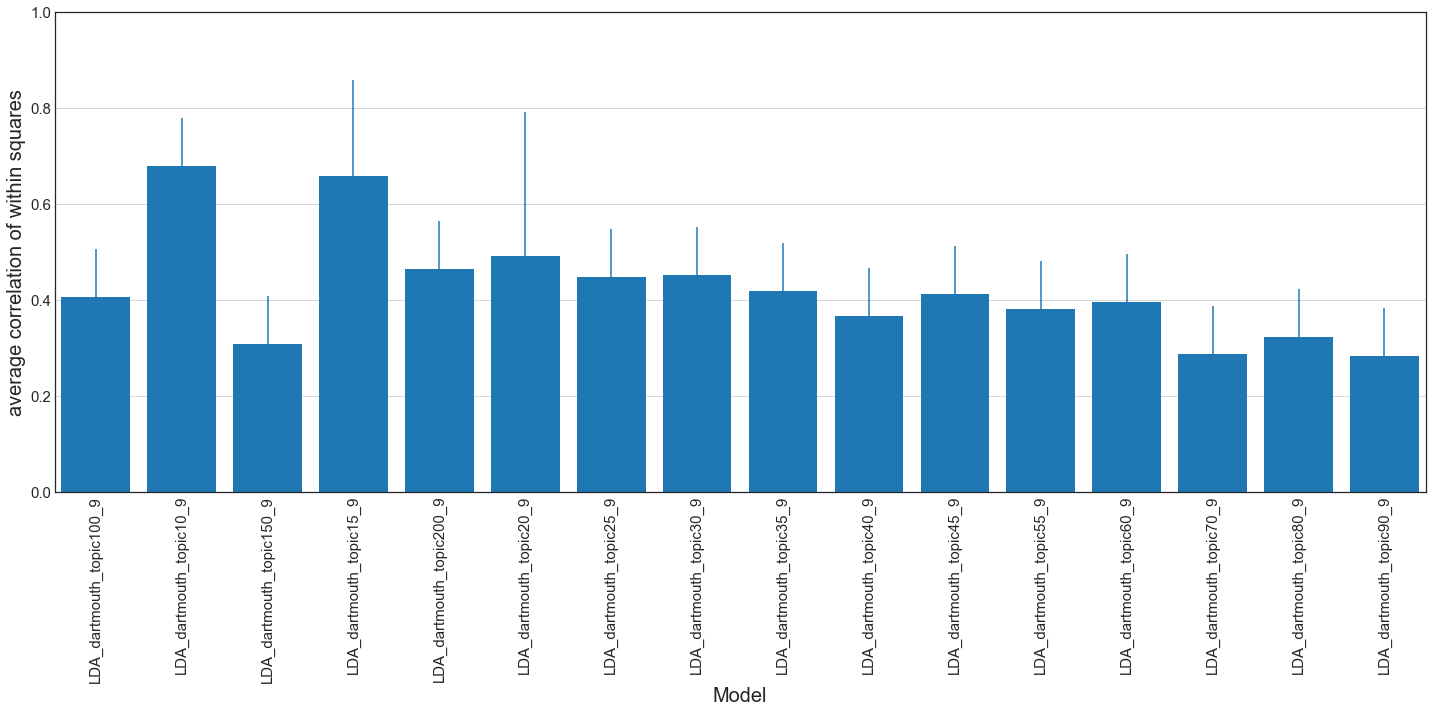

In [77]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))
c = [.1,.2,.3,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1] # fake because error is too small to see
barlist = plt.bar(evaluate_wiki['model'],evaluate_wiki['correlation_mean'])
plt.errorbar(evaluate_wiki['model'],evaluate_wiki['correlation_mean'],yerr=c, linestyle="None")
plt.margins(x=0.005)
plt.xticks(rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Model', fontsize=20)
plt.ylabel('average correlation of within squares', fontsize=20)
plt.grid(axis='y')

axes = plt.gca()
axes.set_ylim([0,1])

plt.tight_layout()
#plt.savefig('model_evaluation_within_squares.pdf',facecolor=fig.get_facecolor(), edgecolor='none')
#plt.savefig('model_evaluation_within_squares.png', edgecolor='none')

In [78]:
folders = ['LDA_dartmouth_topic10', 'LDA_dartmouth_topic15', 'LDA_dartmouth_topic20', 'LDA_dartmouth_topic25',
          'LDA_dartmouth_topic30','LDA_dartmouth_topic35','LDA_dartmouth_topic40','LDA_dartmouth_topic45',
          'LDA_dartmouth_topic55','LDA_dartmouth_topic60','LDA_dartmouth_topic70',
          'LDA_dartmouth_topic80','LDA_dartmouth_topic90','LDA_dartmouth_topic100','LDA_dartmouth_topic150',
          'LDA_dartmouth_topic200']

counter_row = 0
evaluate_wiki = pd.DataFrame()
evaluate_wiki = evaluate_wiki.fillna(0)

for folder in folders:
    
    measure = []
    
    flist = glob.glob(os.path.join(base_dir,'output_robust','{0}','*.csv').format(folder))

    topic_segments = 4

    for file in flist:

        counter = 0

        subset_corrs = []
        between_corrs = []

        data = pd.read_csv(file)
        #new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']
        new_header = ['computer_science_1','computer_science_2','computer_science_3','computer_science_4','football_1','football_2','football_3','football_4','fraternities_and_sororities_1','fraternities_and_sororities_2','fraternities_and_sororities_3','fraternities_and_sororities_4','neuroscience_1','neuroscience_2','neuroscience_3','neuroscience_4','religion_1','religion_2','religion_3','religion_4','theatre_1','theatre_2','theatre_3','theatre_4']

        data = data.sort_values(by=['topic']) # this is critcal

        data.pop('Unnamed: 0')
        data.pop('topic')

        topics_transpose = data.transpose()
        topics_transpose.columns = new_header

        corr_matrix=topics_transpose.corr()

        #between_corrs.append(np.sum(corr_matrix["choir_1"][4:]))
        #between_corrs.append(np.sum(corr_matrix["choir_2"][4:]))
        #between_corrs.append(np.sum(corr_matrix["choir_3"][4:]))
        #between_corrs.append(np.sum(corr_matrix["choir_4"][4:]))
        #between_corrs.append(np.sum(corr_matrix["computer_science_1"][8:]))
        #between_corrs.append(np.sum(corr_matrix["computer_science_2"][8:]))
        #between_corrs.append(np.sum(corr_matrix["computer_science_3"][8:]))
        #between_corrs.append(np.sum(corr_matrix["computer_science_4"][8:]))
        #between_corrs.append(np.sum(corr_matrix["dining_hall_1"][12:]))
        #between_corrs.append(np.sum(corr_matrix["dining_hall_2"][12:]))
        #between_corrs.append(np.sum(corr_matrix["dining_hall_3"][12:]))
        #between_corrs.append(np.sum(corr_matrix["dining_hall_4"][12:]))
        #between_corrs.append(np.sum(corr_matrix["football_1"][16:]))
        #between_corrs.append(np.sum(corr_matrix["football_2"][16:]))
        #between_corrs.append(np.sum(corr_matrix["football_3"][16:]))
        #between_corrs.append(np.sum(corr_matrix["football_4"][16:]))
        #between_corrs.append(np.sum(corr_matrix["fraternity_1"][20:]))
        #between_corrs.append(np.sum(corr_matrix["fraternity_2"][20:]))
        #between_corrs.append(np.sum(corr_matrix["fraternity_3"][20:]))
        #between_corrs.append(np.sum(corr_matrix["fraternity_4"][20:]))
        #between_corrs.append(np.sum(corr_matrix["sorority_1"][24:]))
        #between_corrs.append(np.sum(corr_matrix["sorority_2"][24:]))
        #between_corrs.append(np.sum(corr_matrix["sorority_3"][24:]))
        #between_corrs.append(np.sum(corr_matrix["sorority_4"][24:]))

        between_corrs.append(np.sum(corr_matrix["computer_science_1"][4:]))
        between_corrs.append(np.sum(corr_matrix["computer_science_2"][4:]))
        between_corrs.append(np.sum(corr_matrix["computer_science_3"][4:]))
        between_corrs.append(np.sum(corr_matrix["computer_science_4"][4:]))
        between_corrs.append(np.sum(corr_matrix["football_1"][8:]))
        between_corrs.append(np.sum(corr_matrix["football_2"][8:]))
        between_corrs.append(np.sum(corr_matrix["football_3"][8:]))
        between_corrs.append(np.sum(corr_matrix["football_4"][8:]))
        between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_1"][12:]))
        between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_2"][12:]))
        between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_3"][12:]))
        between_corrs.append(np.sum(corr_matrix["fraternities_and_sororities_4"][12:]))
        between_corrs.append(np.sum(corr_matrix["neuroscience_1"][16:]))
        between_corrs.append(np.sum(corr_matrix["neuroscience_2"][16:]))
        between_corrs.append(np.sum(corr_matrix["neuroscience_3"][16:]))
        between_corrs.append(np.sum(corr_matrix["neuroscience_4"][16:]))
        between_corrs.append(np.sum(corr_matrix["religion_1"][20:]))
        between_corrs.append(np.sum(corr_matrix["religion_2"][20:]))
        between_corrs.append(np.sum(corr_matrix["religion_3"][20:]))
        between_corrs.append(np.sum(corr_matrix["religion_4"][20:]))

        #between_average = (np.sum(between_corrs))/336
        between_average = (np.sum(between_corrs))/240

        data = pd.read_csv(file)
        data = data.sort_values(by=['topic'])

        for i in range(6):
            subset = data[counter:counter+topic_segments]
            subset.pop('Unnamed: 0')
            subset.pop('topic')

            topics_transpose = subset.transpose()
            #topics_transpose.columns = new_header

            corr_matrix=topics_transpose.corr()

            subset_correlation = np.sum(np.tril(corr_matrix, -1))/6
            subset_corrs.append(subset_correlation)

            counter = counter + 4

        mean_hits = np.mean(subset_corrs)

        within_minus_between = mean_hits - between_average
        measure.append(within_minus_between)

    evaluate_wiki.at[counter_row,'model'] = folder
    evaluate_wiki.at[counter_row,'correlation_mean'] = np.mean(measure)
    evaluate_wiki.at[counter_row,'correlation_std'] = np.std(measure)
    
    counter_row = counter_row + 1

In [79]:
evaluate_wiki

,model,correlation_mean,correlation_std
0,LDA_dartmouth_topic10,0.678822,1.110223e-16
1,LDA_dartmouth_topic15,0.658012,1.110223e-16
2,LDA_dartmouth_topic20,0.491891,0.000000e+00
3,LDA_dartmouth_topic25,0.448170,5.551115e-17
4,LDA_dartmouth_topic30,0.450629,5.551115e-17
5,LDA_dartmouth_topic35,0.418311,1.110223e-16
6,LDA_dartmouth_topic40,0.365861,5.551115e-17
7,LDA_dartmouth_topic45,0.411274,5.551115e-17
8,LDA_dartmouth_topic55,0.379734,5.551115e-17
9,LDA_dartmouth_topic60,0.394582,0.000000e+00


In [56]:
measure.append(mean_hits)

In [44]:
measure

[0.64227029657924251]

In [217]:
data = pd.read_csv(file)
name = file.split('/')[-1].split('.csv')[0]
new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']

data = data.sort_values(by=['topic']) # this is critcal

data.pop('Unnamed: 0')
data.pop('topic')

topics_transpose = data.transpose()
topics_transpose.columns = new_header

corr_matrix=topics_transpose.corr()

In [214]:
data = pd.read_csv(file)
name = file.split('/')[-1].split('.csv')[0]
new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']

data = data.sort_values(by=['topic']) # this is critcal

KeyError: 'topic'

In [220]:
corr_matrix
np.mean(np.tril(corr_matrix, -1))

0.14203592864379552

In [238]:
corr_matrix["theatre_1"][28:]

Series([], Name: theatre_1, dtype: float64)

In [236]:
    between_corrs.append(np.mean(corr_matrix["sorority_1"][20:]))
    between_corrs.append(np.mean(corr_matrix["sorority_2"][20:]))
    between_corrs.append(np.mean(corr_matrix["sorority_3"][20:]))
    between_corrs.append(np.mean(corr_matrix["sorority_4"][20:]))
    between_corrs.append(np.mean(corr_matrix["theatre_1"][24:]))
    between_corrs.append(np.mean(corr_matrix["theatre_2"][24:]))
    between_corrs.append(np.mean(corr_matrix["theatre_3"][24:]))
    between_corrs.append(np.mean(corr_matrix["theatre_4"][24:]))

dining_hall_1    0.118321
dining_hall_2    0.146080
dining_hall_3    0.045871
dining_hall_4   -0.043333
football_1      -0.079632
football_2       0.157577
football_3       0.117964
football_4      -0.032805
fraternity_1     0.198659
fraternity_2     0.434124
fraternity_3     0.075581
fraternity_4     0.365723
sorority_1       0.254273
sorority_2       0.146289
sorority_3      -0.005488
sorority_4       0.061177
theatre_1        0.170361
theatre_2        0.119141
theatre_3        0.277232
theatre_4        0.155819
Name: computer_science_1, dtype: float64

In [184]:
within_average

0.93271973097669636

In [159]:
np.mean(subset_corrs)

0.55055047581765926

In [143]:
data[0:4]
data[4:9]
data[10:14]
data[15:19]
data[20:24]
data[25:29]

[0.67447264490194281,
 0.42986432511888184,
 0.24737508548604689,
 0.43306585893637956,
 0.43448774708281218,
 0.33652086937891079,
 0.0]

In [156]:
data[4:8]


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,81,82,83,84,85,86,87,88,89,topic
1,1,0.006782,2.218669e-04,2.557792e-05,4.323615e-06,0.041623,2.721199e-15,1.704145e-18,0.019162,0.000003,...,2.629949e-04,0.008521,1.342118e-10,9.408297e-04,1.142370e-18,3.415973e-11,3.235577e-04,6.025285e-13,1.144034e-02,computer
3,3,0.001829,1.289220e-07,6.374072e-12,9.087219e-06,0.051413,3.218330e-26,3.829283e-19,0.031045,0.014779,...,5.488425e-11,0.010045,1.216102e-03,3.382796e-08,9.568311e-04,1.434980e-03,1.771403e-11,3.141452e-03,1.044178e-08,computer
6,6,0.000933,5.332478e-04,8.197539e-06,1.299440e-11,0.036630,2.373858e-24,2.664154e-03,0.031702,0.008591,...,4.292928e-04,0.000005,1.056701e-02,2.613560e-07,4.339790e-13,2.114343e-05,9.520223e-08,2.179633e-06,1.228200e-03,computer
26,26,0.005846,3.554373e-06,2.263013e-06,8.179800e-09,0.036490,1.715092e-02,1.025824e-07,0.021312,0.008880,...,9.958111e-03,0.003972,1.136875e-08,3.341886e-03,1.962113e-10,8.387953e-07,4.302116e-03,5.888219e-07,3.503469e-05,computer


In [118]:
subset = data[0:4]
subset.pop('Unnamed: 0')
subset.pop('topic')

topics_transpose = subset.transpose()
#topics_transpose.columns = new_header

corr_matrix=topics_transpose.corr()
        

In [120]:
corr_matrix


,0,7,10,20
0,1.000000,0.502273,0.577544,0.590955
7,0.502273,1.000000,0.745902,0.748852
10,0.577544,0.745902,1.000000,0.881311
20,0.590955,0.748852,0.881311,1.000000


In [123]:
np.tril(corr_matrix, -1)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.50227272,  0.        ,  0.        ,  0.        ],
       [ 0.57754429,  0.74590185,  0.        ,  0.        ],
       [ 0.59095478,  0.74885161,  0.88131062,  0.        ]])

In [125]:
test = np.tril(corr_matrix, -1)
np.sum(test)/6

0.67447264490194281

In [131]:
test = np.sum(np.tril(corr_matrix, -1))/6
print(test)

0.945486163751


In [63]:
flist = glob.glob(os.path.join(base_dir,'output_long','*.csv'))


    
perfect_data = pd.read_csv(flist[1])
perfect_data = perfect_data['0'].values

test_data = pd.read_csv(flist[0])
test_data = test_data['0'].values

#similarity_output = perfect_data.similarity(test_data)
#corr = list(similarity_output.values())[0]
#p = list(similarity_output.values())[1]

In [59]:
perfect_data

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [64]:
np.corrcoef(test_data,perfect_data)

array([[ 1.        ,  0.71507233],
       [ 0.71507233,  1.        ]])

# Plot Perfect Data

In [338]:
data = pd.read_csv(os.path.join(base_dir,'perfect_wiki_4.csv'), header=None)
#new_header = ['choir_1','choir_2','choir_3','choir_4','computer_science_1','computer_science_2','computer_science_3','computer_science_4','dining_hall_1','dining_hall_2','dining_hall_3','dining_hall_4','football_1','football_2','football_3','football_4','fraternity_1','fraternity_2','fraternity_3','fraternity_4','sorority_1','sorority_2','sorority_3','sorority_4','theatre_1','theatre_2','theatre_3','theatre_4']
new_header = ['computer_science_1','computer_science_2','computer_science_3','computer_science_4','football_1','football_2','football_3','football_4','fraternities_and_sororities_1','fraternities_and_sororities_2','fraternities_and_sororities_3','fraternities_and_sororities_4','neuroscience_1','neuroscience_2','neuroscience_3','neuroscience_4','religion_1','religion_2','religion_3','religion_4','theatre_1','theatre_2','theatre_3','theatre_4']

topics_transpose = data.transpose()
topics_transpose.columns = new_header

corr_matrix=topics_transpose.corr()

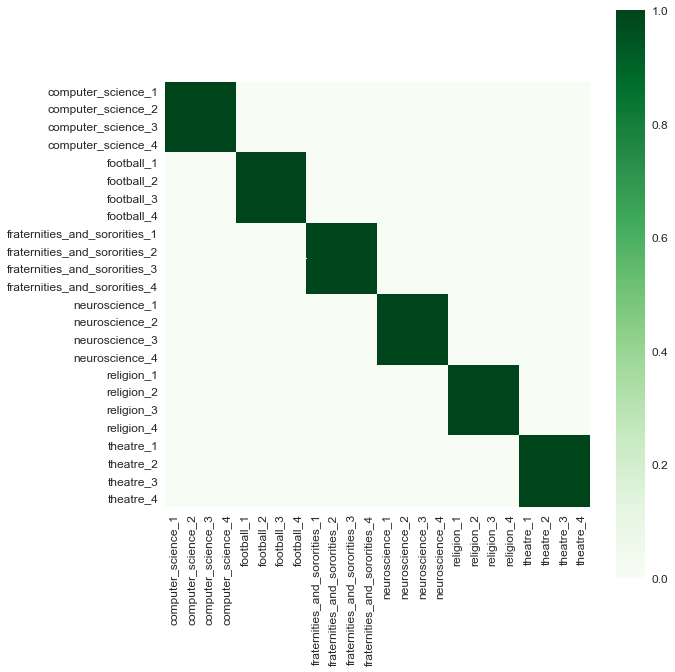

In [365]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, square=True, cmap="Greens", vmin=0, vmax=1)


#plt.plot(evaluate_wiki['model'],evaluate_wiki['correlation'])
#plt.xticks(rotation='vertical')
#plt.xlabel('model')
#plt.ylabel('within_average minus between_average')
plt.tight_layout()
plt.savefig('perfect_model.pdf',facecolor=fig.get_facecolor(), edgecolor='none')

In [253]:
corr_matrix

,computer_science_1,computer_science_2,computer_science_3,computer_science_4,football_1,football_2,football_3,football_4,fraternities_and_sororities_1,fraternities_and_sororities_2,...,neuroscience_3,neuroscience_4,religion_1,religion_2,religion_3,religion_4,theatre_1,theatre_2,theatre_3,theatre_4
computer_science_1,1.0,1.0,1.0,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
computer_science_2,1.0,1.0,1.0,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
computer_science_3,1.0,1.0,1.0,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
computer_science_4,1.0,1.0,1.0,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
football_1,-0.2,-0.2,-0.2,-0.2,1.0,1.0,1.0,1.0,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
football_2,-0.2,-0.2,-0.2,-0.2,1.0,1.0,1.0,1.0,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
football_3,-0.2,-0.2,-0.2,-0.2,1.0,1.0,1.0,1.0,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
football_4,-0.2,-0.2,-0.2,-0.2,1.0,1.0,1.0,1.0,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
fraternities_and_sororities_1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,1.0,1.0,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
fraternities_and_sororities_2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,1.0,1.0,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2


In [254]:
data_1 = nltools.data.Adjacency(data=corr_matrix.values)

In [257]:
data_1
data_1.write('test.csv', method='long')

In [4]:
corr_matrix

,choir_1,choir_2,choir_3,choir_4,computer_science_1,computer_science_2,computer_science_3,computer_science_4,dining_hall_1,dining_hall_2,...,fraternity_3,fraternity_4,sorority_1,sorority_2,sorority_3,sorority_4,theatre_1,theatre_2,theatre_3,theatre_4
choir_1,1.000000,0.908783,0.873400,0.919582,0.780221,0.790758,0.744566,0.794062,0.890327,0.853859,...,0.814081,0.805175,0.796484,0.854968,0.882891,0.822129,0.956415,0.906343,0.842809,0.817944
choir_2,0.908783,1.000000,0.994479,0.994130,0.731509,0.732867,0.680807,0.746332,0.781002,0.721493,...,0.759239,0.761039,0.751788,0.792504,0.806812,0.785784,0.847889,0.798310,0.768660,0.759494
choir_3,0.873400,0.994479,1.000000,0.982542,0.731739,0.734040,0.690452,0.744745,0.750186,0.713368,...,0.750708,0.750199,0.745529,0.771858,0.782515,0.777359,0.807218,0.738802,0.742337,0.722230
choir_4,0.919582,0.994130,0.982542,1.000000,0.676710,0.680718,0.624980,0.694362,0.756714,0.691604,...,0.714078,0.713981,0.703433,0.754860,0.775415,0.741223,0.841674,0.808250,0.742664,0.742523
computer_science_1,0.780221,0.731509,0.731739,0.676710,1.000000,0.998488,0.972463,0.998486,0.921947,0.928313,...,0.984595,0.979709,0.985637,0.963948,0.954175,0.978619,0.824299,0.665943,0.810472,0.713380
computer_science_2,0.790758,0.732867,0.734040,0.680718,0.998488,1.000000,0.979395,0.996651,0.920142,0.943854,...,0.981188,0.972601,0.980949,0.957249,0.949651,0.973504,0.827113,0.661733,0.810906,0.708075
computer_science_3,0.744566,0.680807,0.690452,0.624980,0.972463,0.979395,1.000000,0.960576,0.853723,0.963211,...,0.922180,0.907444,0.921742,0.886925,0.878840,0.908503,0.804494,0.620480,0.837016,0.722169
computer_science_4,0.794062,0.746332,0.744745,0.694362,0.998486,0.996651,0.960576,1.000000,0.933154,0.920841,...,0.992513,0.987981,0.993076,0.974190,0.965640,0.988046,0.826218,0.672014,0.796576,0.701875
dining_hall_1,0.890327,0.781002,0.750186,0.756714,0.921947,0.920142,0.853723,0.933154,1.000000,0.890285,...,0.952745,0.951928,0.945196,0.970326,0.977837,0.952838,0.896310,0.806308,0.803196,0.746484
dining_hall_2,0.853859,0.721493,0.713368,0.691604,0.928313,0.943854,0.963211,0.920841,0.890285,1.000000,...,0.893708,0.871579,0.883894,0.875689,0.884573,0.878129,0.882865,0.723522,0.872165,0.768653


In [ ]:
data = pd.read_csv(os.path.join(base_dir,'perfect_wiki_20.csv'), header=None)
new_header = ['pod_cars_1','pod_cars_2','pod_cars_3','pod_cars_4',
                      'pod_refugee_1','pod_refugee_2','pod_refugee_3','pod_refugee_4',
                      'pod_me_too_1','pod_me_too_2','pod_me_too_3','pod_me_too_4',
                      'pod_housing_1','pod_housing_2','pod_housing_3','pod_housing_4',
                      'pod_conservative_1','pod_conservative_2','pod_conservative_3','pod_conservative_4',
                      'pod_magic_1','pod_magic_2','pod_magic_3','pod_magic_4',
                      'biology_1','biology_2','biology_3','biology_4',
                      'calculus_1','calculus_2','calculus_3','calculus_4',
                      'comp_sci_1','comp_sci_2','comp_sci_3','comp_sci_4',
                      'neuro_sci_1','neuro_sci_2','neuro_sci_3','neuro_sci_4',
                      'baseball_1','baseball_2','baseball_3','baseball_4',
                      'basketball_1','basketball_2','basketball_3','basketball_4',
                      'football_1','football_2','football_3','football_4',
                      'choir_1','choir_2','choir_3','choir_4',
                      'greek_life_1','greek_life_2','greek_life_3','greek_life_4',
                      'hip_hop_1','hip_hop_2','hip_hop_3','hip_hop_4',
                      'literature_1','literature_2','literature_3','literature_4',
                      'religion_1','religion_2','religion_3','religion_4',
                      'sitcom_1','sitcom_2','sitcom_3','sitcom_4',
                      'theatre_1','theatre_2','theatre_3','theatre_4']
topics_transpose = data.transpose()
topics_transpose.columns = new_header

corr_matrix=topics_transpose.corr()
data_1 = nltools.data.Adjacency(data=corr_matrix.values)
data_1.write('perfect_wiki_long_20.csv', method='long')

In [ ]:
data = pd.read_csv(os.path.join(base_dir,'output','LDA_dartmouth_topic10.csv'))


variable_key = []

## MOTION ENERGY ##

data = pd.read_csv(os.path.join(base_dir,'audio_features_reduced.csv'))
data_round_2 = data.loc[(data['subID'] >= 40) & (data['subID'] <= 50)]
variable = 'amplitude_var' 

data_1 = data_round_2[variable].groupby([data_round_2['subID'], data_round_2['partnerID']]).mean().unstack()
data_1 = data_1.fillna(value=0)
data_1 = nltools.data.Adjacency(data=data_1,matrix_type='directed')
data_full = data_1

variable_key.append(variable)

## POST-CONVO RATINGS ##

data = pd.read_csv(os.path.join(base_dir,'postConvoRatings_all_rounds.csv'))
data_round_2 = data.loc[(data['subID'] >= 40) & (data['subID'] <= 50)]

variables = ['enjoyConvo', 'partnerDisclosed', 'extraverted_self'] 

for variable in variables:

    data_2 = data_round_2[variable].groupby([data_round_2['subID'], data_round_2['partnerID']]).mean().unstack()
    data_2 = data_2.fillna(value=0)
    data_2 = nltools.data.Adjacency(data=data_2,matrix_type='directed')

    variable_key.append(variable)

    data_full = data_full.append(data_2)
    
## SPEAKING TIME ##

data = pd.read_csv(os.path.join(base_dir,'speaking_time.csv'))
data_round_2 = data.loc[(data['subID'] >= 40) & (data['subID'] <= 50)]

variables = ['minutes_talking_alone','minutes_talking_together'] 

for variable in variables:

    data_2 = data_round_2[variable].groupby([data_round_2['subID'], data_round_2['partnerID']]).mean().unstack()
    data_2 = data_2.fillna(value=0)
    data_2 = nltools.data.Adjacency(data=data_2,matrix_type='directed')

    variable_key.append(variable)

    data_full = data_full.append(data_2)


In [ ]:
similarity = pd.DataFrame()
similarity = similarity.fillna(0) # with 0s rather than NaNs

counter = 0 

for i in range(len(data_full)):
    
    for j in range(len(data_full)):
    
        similarity_output = data_full[i].similarity(data_full[j])
        corr = list(similarity_output.values())[0]
        p = list(similarity_output.values())[1]
        
        similarity.at[counter,'feature_1'] = variable_key[i]
        similarity.at[counter,'feature_2'] = variable_key[j]
        similarity.at[counter,'correlation'] = corr
        similarity.at[counter,'p_value'] = p
        
        counter = counter + 1